# Table of Contents
## 1.0 Setup
## 2.0 Data Cleaning and Wrangling
## 3.0 Time Series Analysis - Decomposition
        3.1 Additive Model
        3.2 Multiplicative Model
## 4.0 Testing for Stationarity
        4.1 Dickey-Fuller Test
        4.2 Autocorrelation Test
## 5.0 Stationarizing the Data - Differencing
## 6.0 Time Series Forecasting
        6.1 Defining the Parameters
        6.2 Splitting the Data
        6.3 Running and Fitting the Model
## 7.0 Exporting Data

## 1.0 Setup

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings # This is a library that handles warnings.
import gc

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
# Defining the path

path = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 6\11-22 Food Balance Sheet Analysis\2.0 Data')

In [3]:
# Importing fbs_hist.pkl as fbs

fbs = pd.read_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_hist.pkl'))

In [4]:
# Setting up graph display options

%matplotlib inline

In [5]:
# Setting up display options

pd.set_option('display.max_rows', None)

In [6]:
# Defining a fixed size for all special charts

from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

## 2.0 Data Cleaning and Wrangling

In [7]:
fbs.shape

(9284, 10)

In [8]:
fbs.head(100)

Element,Country,Year,Export Quantity,Food,Import Quantity,Production,Domestic Supply Quantity,Total Population,Import Dependency Ratio,Self-sufficiency Ratio
0,Afghanistan,1961,111.00,4381.30,86.00,5557.30,5527.30,8954.0,1.554507,100.451892
1,Afghanistan,1962,134.00,4347.30,54.00,5610.30,5528.30,9142.0,0.976439,101.446576
2,Afghanistan,1963,128.00,4229.30,113.00,5423.30,5420.30,9340.0,2.089381,100.277351
3,Afghanistan,1964,107.00,4715.30,171.00,5841.30,5904.30,9547.0,2.895704,98.916228
4,Afghanistan,1965,139.00,4876.30,195.00,6074.30,6114.30,9765.0,3.180921,99.086505
5,Afghanistan,1966,213.00,4722.30,260.00,5921.30,5915.30,9990.0,4.356349,99.212506
6,Afghanistan,1967,228.00,5250.40,257.00,6511.40,6531.40,10222.0,3.929423,99.556602
7,Afghanistan,1968,231.00,5341.40,109.00,6685.40,6611.40,10466.0,1.660725,101.858793
8,Afghanistan,1969,232.00,5488.46,177.00,6852.46,6802.46,10729.0,2.603914,100.809126
9,Afghanistan,1970,226.00,4888.46,213.00,6127.46,6119.46,11016.0,3.483546,100.212611


In [9]:
fbs['Country'].nunique()

180

The data set contains values for 190 countries and 8 variables (two of which (Self-sufficiency Ratio and Import Dependency Ratio) are calculated using the remaining six variables) for the time period from 1961 to 2019.

Since some of the countries either no longer exist or have changed their names, the data will be cleaned so only data for the countries which exist today remain.

In [10]:
fbs['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Ethiopia PDR',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana',

After comparing the countries in the table with the list of the world countries, a list of countries to delete was established, but it also became obvious that the FAO does not have the data for all of the countries of the world.

In [11]:
# Creating a list of areas to be extracted

areas = ['Ethiopia PDR', 'Netherlands Antilles (former)']

In [12]:
# Dropping areas from fbs data frame

fbs = fbs.loc[~fbs['Country'].isin(areas)]

In [13]:
fbs.shape

(9202, 10)

The time series analysis will be done for Self-sufficiency Ratio for Germany.

In [14]:
# Creating a data frame with only the data for Germany

fbs_DE = fbs.loc[fbs['Country'] == 'Germany']

fbs_DE.shape

(59, 10)

In [15]:
fbs_DE.head()

Element,Country,Year,Export Quantity,Food,Import Quantity,Production,Domestic Supply Quantity,Total Population,Import Dependency Ratio,Self-sufficiency Ratio
3560,Germany,1961,2627.11,59076.80,22866.05,111449.97,136292.91,73900.0,17.363687,84.631250
3561,Germany,1962,2748.47,61022.31,26765.86,125483.02,144517.42,74552.0,17.903536,83.934900
3562,Germany,1963,2699.83,62727.77,23164.23,133723.28,151556.68,75257.0,15.023399,86.727604
3563,Germany,1964,3137.54,63502.72,26176.69,130790.53,153310.68,75971.0,17.016671,85.022949
3564,Germany,1965,3698.76,64145.41,27742.98,123300.49,151437.72,76655.0,18.828623,83.681654


In [16]:
# Dropping all columns except 'Year' and 'Self-sufficiency Ratio'

fbs_DE = fbs_DE.drop(fbs_DE.columns[[0, 2, 3, 4, 5, 6, 7, 8]], axis = 1)

In [17]:
fbs_DE.head(10)

Element,Year,Self-sufficiency Ratio
3560,1961,84.631250
3561,1962,83.934900
3562,1963,86.727604
3563,1964,85.022949
3564,1965,83.681654
3565,1966,83.443930
3566,1967,85.330459
3567,1968,85.663874
3568,1969,84.062089
3569,1970,83.160796


In [18]:
fbs_DE.dtypes

Element
Year                        int64
Self-sufficiency Ratio    float64
dtype: object

In [19]:
fbs_DE['Year'] = fbs_DE['Year'].astype('str')

In [20]:
from datetime import datetime

fbs_DE['datetime'] = pd.to_datetime(fbs_DE['Year'])
fbs_DE = fbs_DE.set_index('datetime') 
fbs_DE.drop(['Year'], axis=1, inplace = True)

fbs_DE.head()

Element,Self-sufficiency Ratio
datetime,
1961-01-01,84.631250
1962-01-01,83.934900
1963-01-01,86.727604
1964-01-01,85.022949
1965-01-01,83.681654


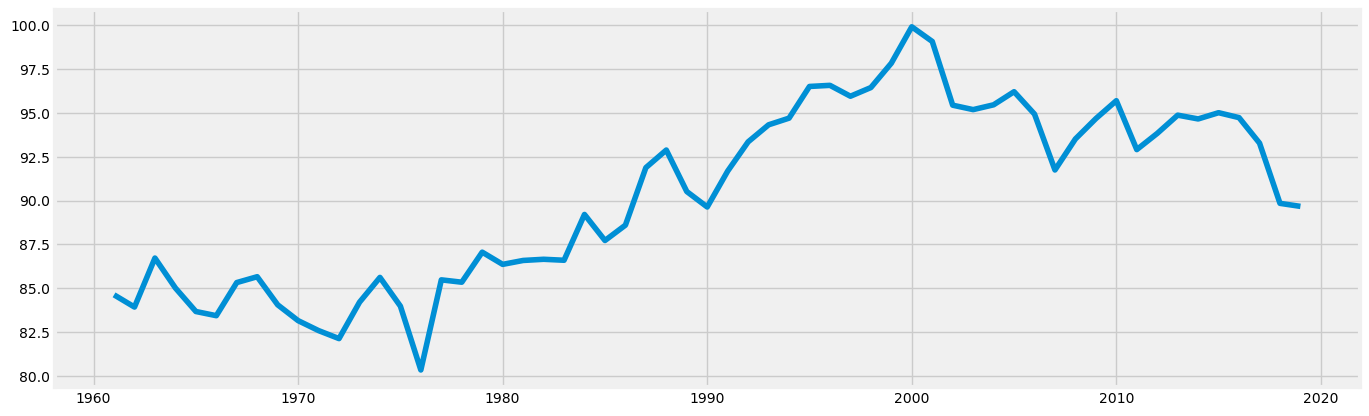

In [21]:
# Plotting the data using matplotlib

plt.figure(figsize = (15,5), dpi = 100)

plt.plot(fbs_DE)

In [22]:
# Checking for missing values 

fbs_DE.isnull().sum()

Element
Self-sufficiency Ratio    0
dtype: int64

In [23]:
# Checking for duplicates

dups = fbs_DE.duplicated()
dups.sum()

0

## 3.0 Time Series Analysis - Decomposition

### 3.1 Additive model

In [24]:
# Decomposing the time series using an additive model

fbs_DE_adi = sm.tsa.seasonal_decompose(fbs_DE, model = 'additive') 

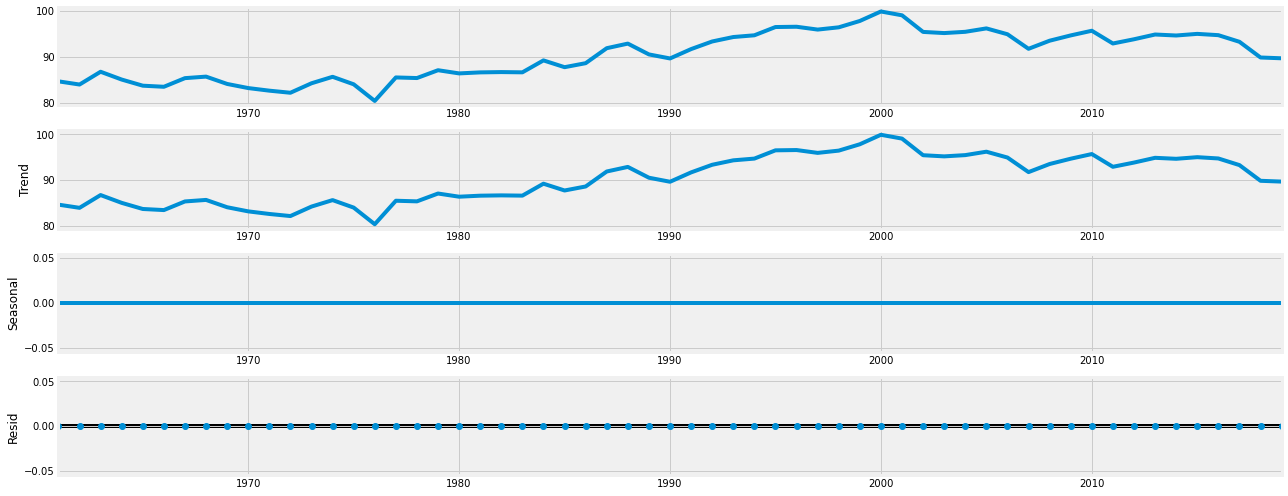

In [25]:
# Plotting the separate components

fbs_DE_adi.plot()
plt.show()

### 3.2 Multiplicative model

In [26]:
# Decomposing the time series using a multiplicative model

fbs_DE_mlt = sm.tsa.seasonal_decompose(fbs_DE, model = 'multiplicative') 

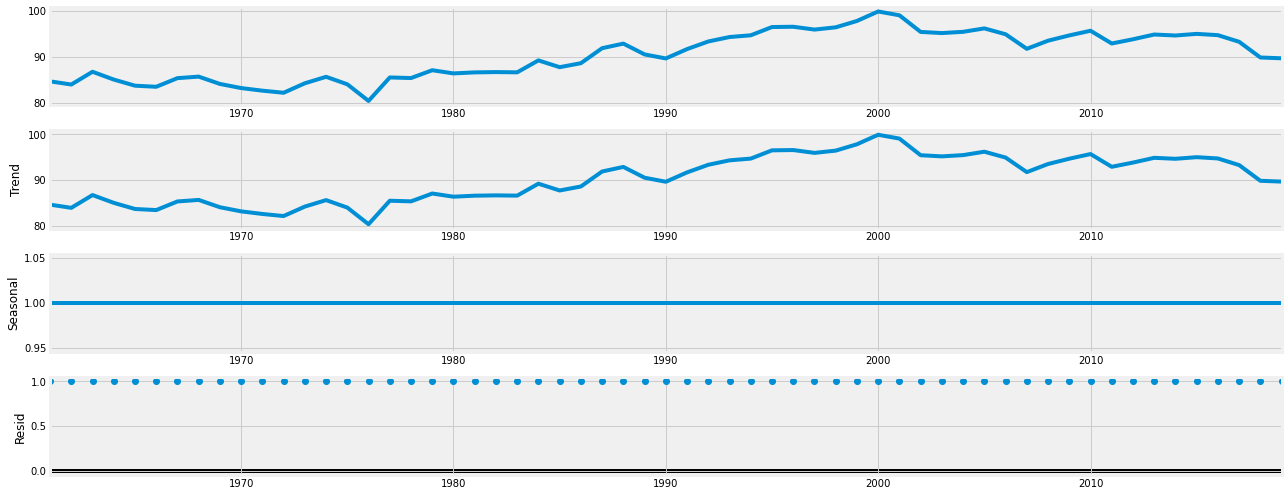

In [27]:
# Plotting the separate components

fbs_DE_mlt.plot()
plt.show()

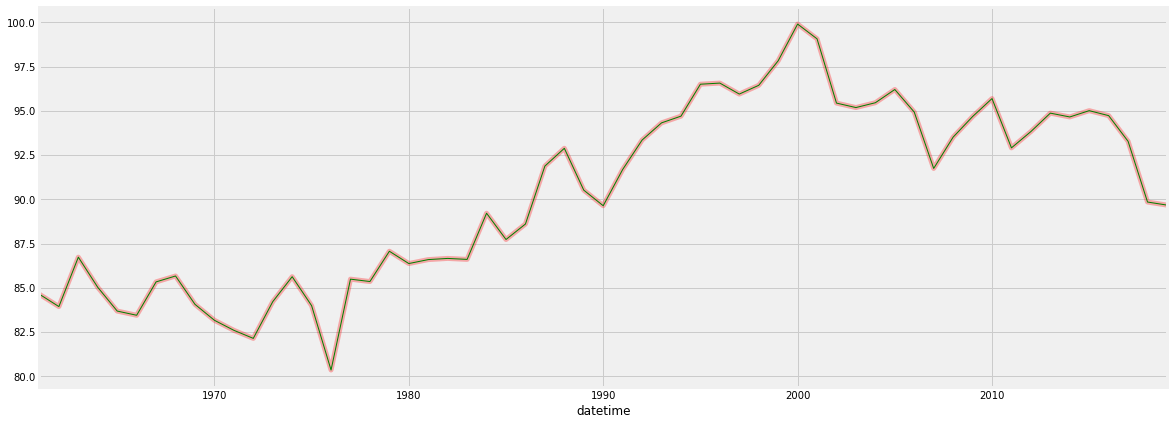

In [28]:
# Evaluating trend components from both models

fbs_DE_adi.trend.plot(color = 'red', linewidth = 5, alpha = 0.3)
fbs_DE_mlt.trend.plot(color = 'green', linewidth = 1)

plt.show()

Trend graphs from both methods are the same, but the residual graph from additive method has less spread-out points compared to the multiplicative method, which makes the additive method a better match for this time series.

## 4.0 Testing for Stationarity

### 4.1 Dickey-Fuller Test

In [29]:
# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(fbs_DE['Self-sufficiency Ratio'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.130434
p-value                         0.702784
Number of Lags Used             3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


Since the Test Statistic is larger than all Critical Values, the null hypothesis cannot be rejected, which means that unit roots exist in the data set and that the time series is not stationary.

### 4.2 Autocorrelation Test

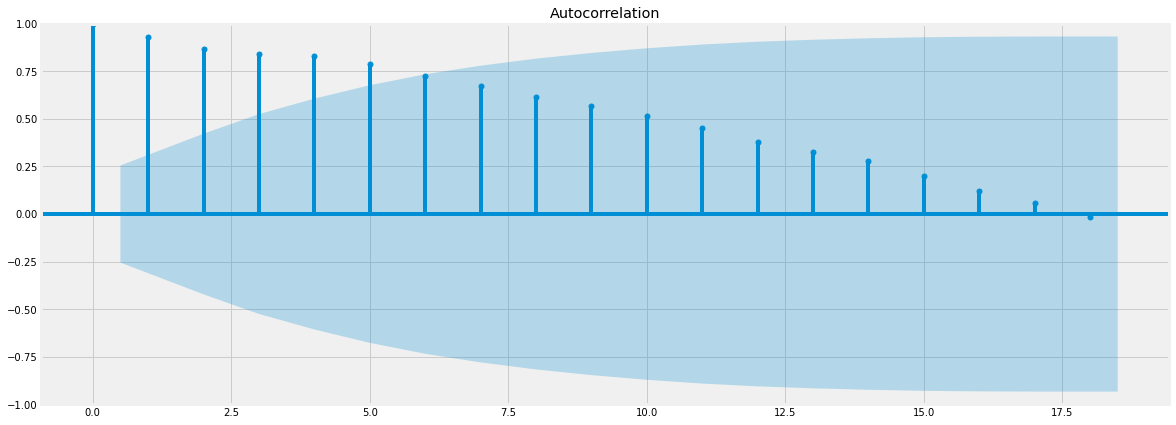

In [30]:
# Importing the autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(fbs_DE)
plt.show()

The autocorrelation graph shows a number of lags outside of the confidence interval, which also confirms the trend component and non-stationarity of the time series.

## 5.0 Stationarizing the Data - Differencing

In [31]:
# Conducting the first round of differencing

fbs_DE_diff = fbs_DE - fbs_DE.shift(1)

In [32]:
# Removing missing values as a result of differencing

fbs_DE_diff.dropna(inplace = True)

In [33]:
# Checking values and headers

fbs_DE_diff.head()

Element,Self-sufficiency Ratio
datetime,
1962-01-01,-0.696349
1963-01-01,2.792703
1964-01-01,-1.704655
1965-01-01,-1.341295
1966-01-01,-0.237724


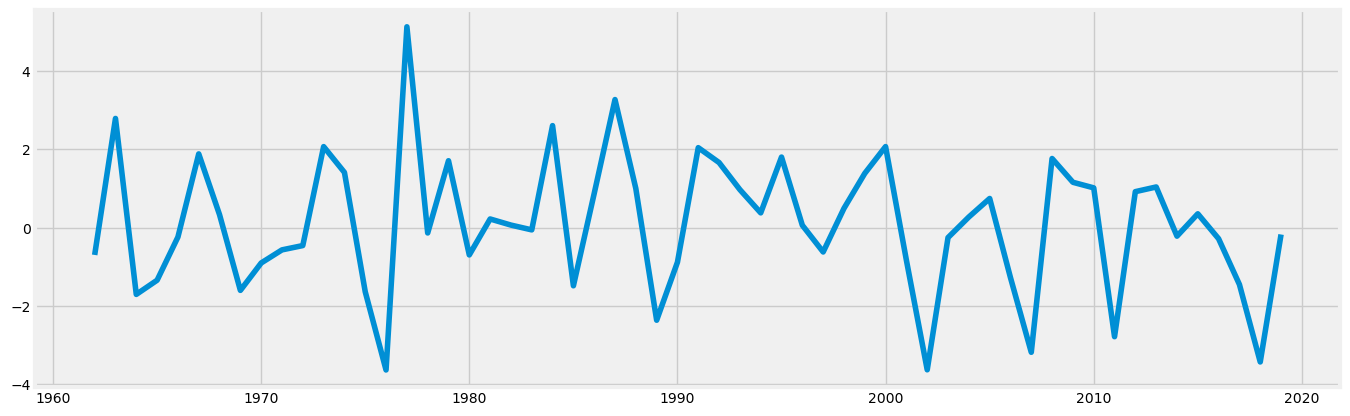

In [34]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize = (15,5), dpi = 100)

plt.plot(fbs_DE_diff)

In [35]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(fbs_DE_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.184607e+00
p-value                        6.333793e-08
Number of Lags Used            2.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


The test statistic value is smaller than all of the critical values and the p-value is smaller than 0.05. That means that the null hypothesis can be rejected and that the data now does not contain unit roots, which makes the time series stationary.

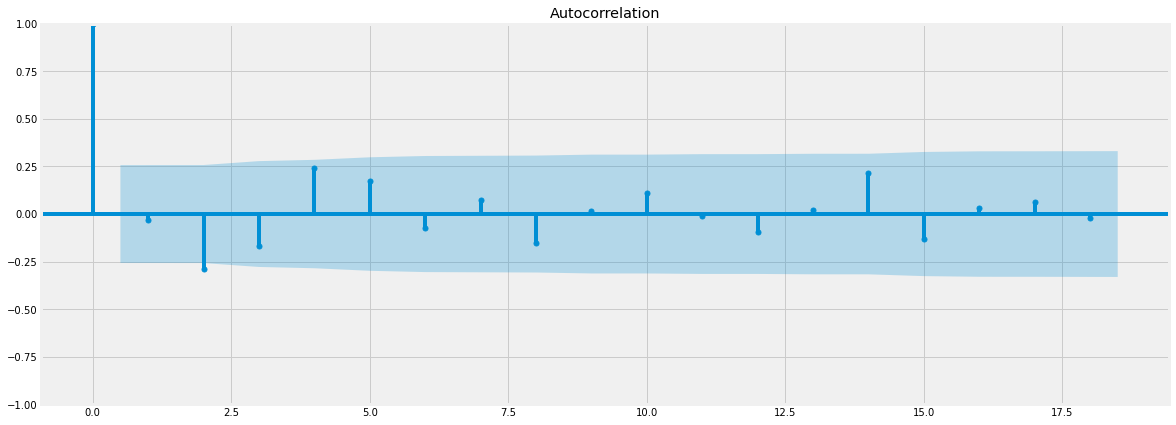

In [36]:
# Plotting the autocorrelation for differentiated time series

plot_acf(fbs_DE_diff)
plt.show()

The autocorrelation plot shows that almost all of the lags are inside the confidence interval, which confirms the stationarity of the data.

## 6.0 Time Series Forecasting

### 6.1 Defining the parameters

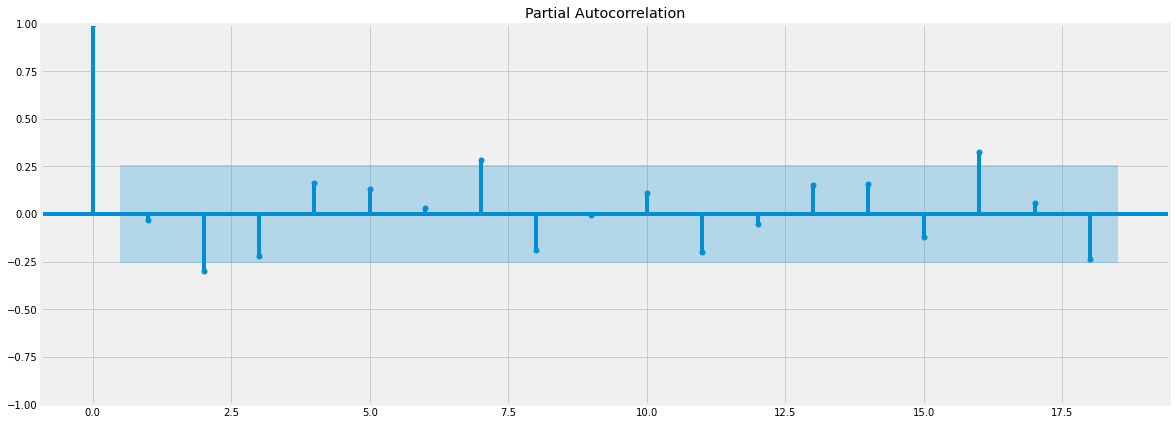

<Figure size 4500x4500 with 0 Axes>

In [37]:
# Plotting partial autocorrelations to determine parameter p

plot_pacf(fbs_DE_diff)
plt.figure(figsize = (15,15), dpi = 300)
plt.show()

Based on the partial autocorrelation graph, I will start with p = 3

In [38]:
# Determining parameter d

# Since one round of differencing was needed to convert the data into stationary,
# the value of d is 1.

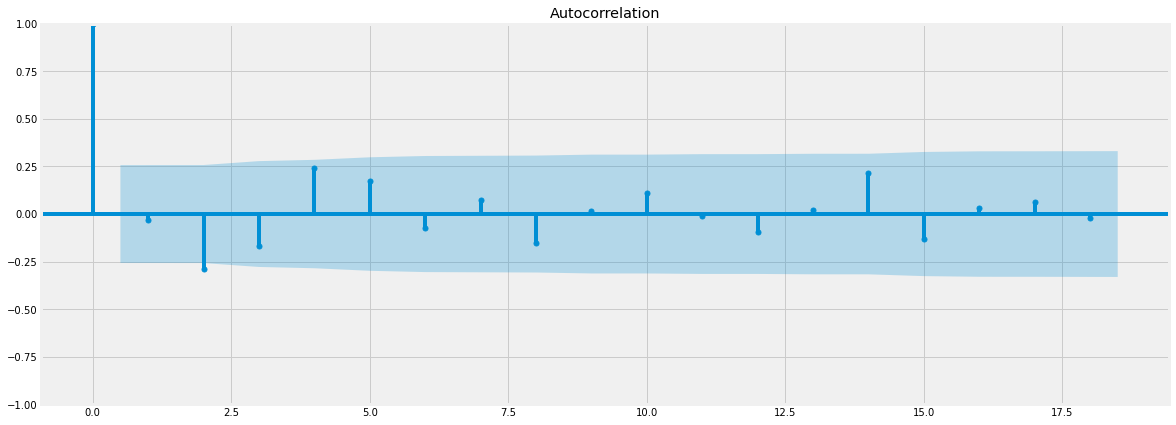

In [39]:
# Plotting autocorrelations to determine parameter q

plot_acf(fbs_DE_diff)
plt.show()

Based on the autocorrelation graph, I will start with q = 3

### 6.2 Splitting the data

In [40]:
# Splitting the data

train = fbs_DE_diff[fbs_DE_diff.index <= '2008-01-01'] 
test = fbs_DE_diff[fbs_DE_diff.index >= '2008-01-01']

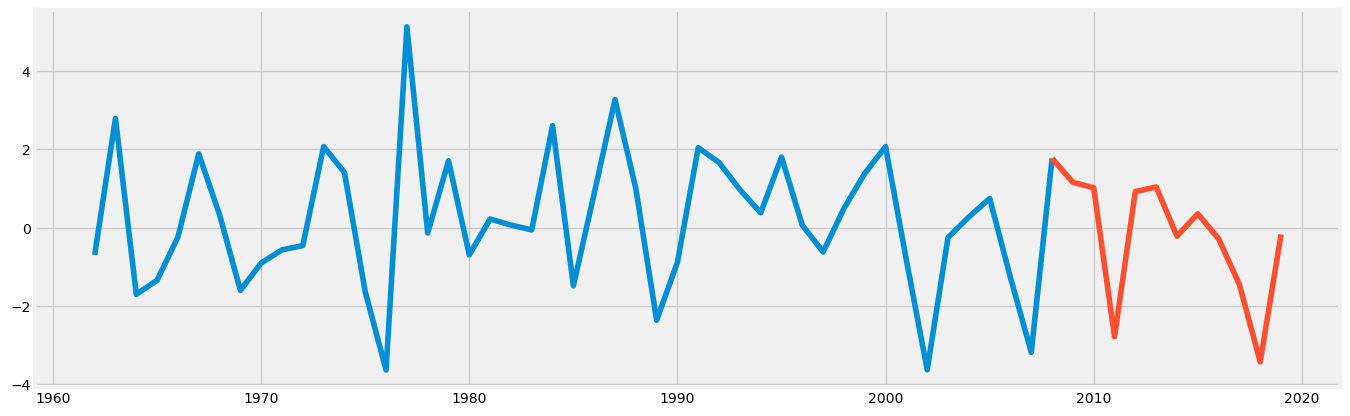

In [41]:
# Plotting both sets in order to see the split

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(train)
plt.plot(test)

In [42]:
test.shape

(12, 1)

### 6.3 Running and Fitting the Model

In [43]:
from statsmodels.tsa.api import ARIMA, SARIMAX

#### ARIMA (3, 1, 3)

In [44]:
model = ARIMA(train, order = (3, 1, 3))  
fitted = model.fit()  
print(fitted.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Self-sufficiency Ratio   No. Observations:                   47
Model:                     ARIMA(3, 1, 3)   Log Likelihood                 -88.180
Date:                    Sun, 11 Dec 2022   AIC                            190.360
Time:                            02:16:50   BIC                            203.160
Sample:                        01-01-1962   HQIC                           195.155
                             - 01-01-2008                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0371      1.433     -0.026      0.979      -2.846       2.772
ar.L2         -0.3380      0.611     -0.553      0.580      -1.536       0.859
ar.L3         -0.294

In [45]:
# Forecast

fc1 = fitted.get_forecast(12, alpha = 0.05)

# Transforming into pandas series

fc1_series = pd.Series(fc1.predicted_mean, index = test.index)
lower_series = pd.Series(fc1.conf_int().iloc[:, 0], index = test.index)
upper_series = pd.Series(fc1.conf_int().iloc[:, 1], index = test.index)


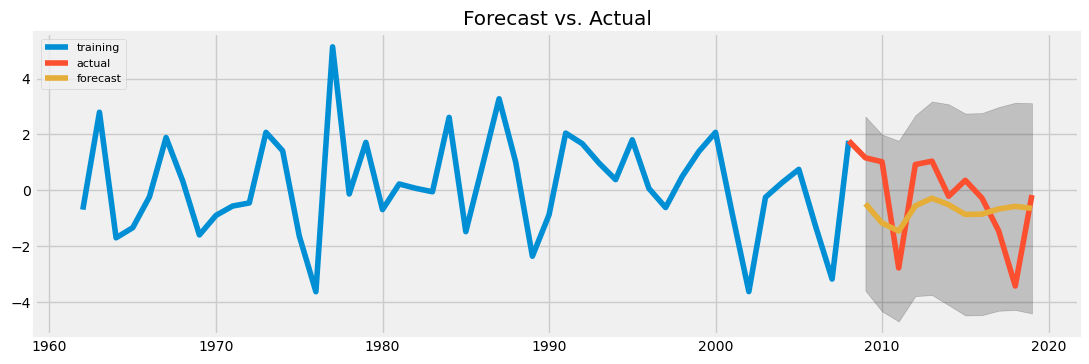

In [46]:
# Plotting the data

plt.figure(figsize = (12,4), dpi = 100)
plt.plot(train, label = 'training')
plt.plot(test, label = 'actual')
plt.plot(fc1_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = .2)
plt.title('Forecast vs. Actual')
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

Even though the actual data is mostly within the confidence level of the forecasted data, there are significant differences between the forecasted and actual values. Additionally, all of the significance levels are larger than 0,05.

#### ARIMA (3, 1, 0)

In [47]:
model = ARIMA(train, order = (3, 1, 0))  
fitted = model.fit()  
print(fitted.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Self-sufficiency Ratio   No. Observations:                   47
Model:                     ARIMA(3, 1, 0)   Log Likelihood                 -95.028
Date:                    Sun, 11 Dec 2022   AIC                            198.056
Time:                            02:16:50   BIC                            205.370
Sample:                        01-01-1962   HQIC                           200.796
                             - 01-01-2008                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7328      0.117     -6.273      0.000      -0.962      -0.504
ar.L2         -0.6804      0.124     -5.504      0.000      -0.923      -0.438
ar.L3         -0.528

In [48]:
# Forecast

fc2 = fitted.get_forecast(12, alpha = 0.05)

# Transforming into pandas series

fc2_series = pd.Series(fc2.predicted_mean, index = test.index)
lower_series = pd.Series(fc2.conf_int().iloc[:, 0], index = test.index)
upper_series = pd.Series(fc2.conf_int().iloc[:, 1], index = test.index)


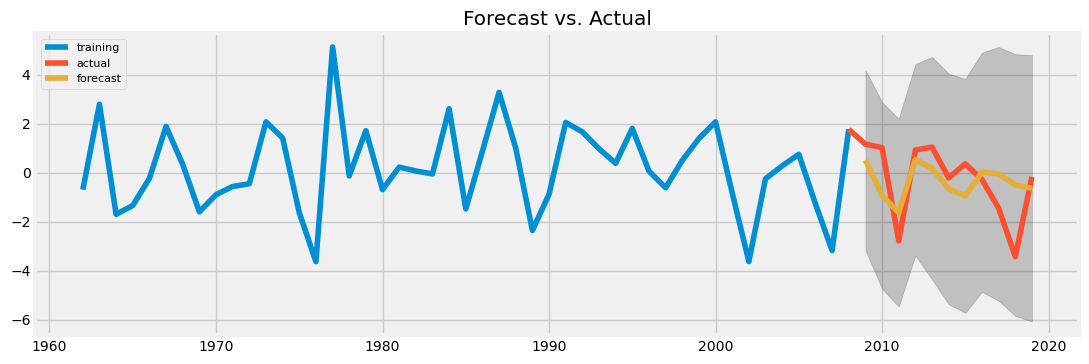

In [49]:
# Plotting the data

plt.figure(figsize = (12,4), dpi = 100)
plt.plot(train, label = 'training')
plt.plot(test, label = 'actual')
plt.plot(fc2_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = .2)
plt.title('Forecast vs. Actual')
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

The significance levels have improved (all are smaller than 0,05), and the graphs of the actual and forecasted values match better. I will further reduce the p parameter too see is it possible to further improve the level of accuracy of the predictions.

#### ARIMA (2, 1, 0)

In [50]:
model = ARIMA(train, order = (2, 1, 0))  
fitted = model.fit()  
print(fitted.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Self-sufficiency Ratio   No. Observations:                   47
Model:                     ARIMA(2, 1, 0)   Log Likelihood                -101.766
Date:                    Sun, 11 Dec 2022   AIC                            209.532
Time:                            02:16:50   BIC                            215.018
Sample:                        01-01-1962   HQIC                           211.587
                             - 01-01-2008                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5379      0.147     -3.668      0.000      -0.825      -0.250
ar.L2         -0.4202      0.129     -3.259      0.001      -0.673      -0.168
sigma2         4.830

In [51]:
# Forecast

fc3 = fitted.get_forecast(12, alpha = 0.05)

# Transforming into pandas series

fc3_series = pd.Series(fc3.predicted_mean, index = test.index)
lower_series = pd.Series(fc3.conf_int().iloc[:, 0], index = test.index)
upper_series = pd.Series(fc3.conf_int().iloc[:, 1], index = test.index)


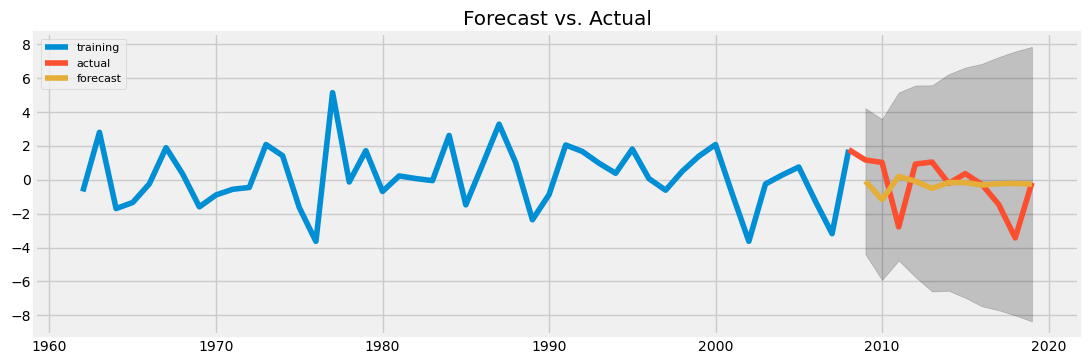

In [52]:
# Plotting the data

plt.figure(figsize = (12,4), dpi = 100)
plt.plot(train, label = 'training')
plt.plot(test, label = 'actual')
plt.plot(fc3_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = .2)
plt.title('Forecast vs. Actual')
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

Even though the significance level in this model is better than in th previous model, the ARIMA(3, 1, 0) model forecasts the values better (visible both on the graph and in the smaller AIC value).

## 7.0 Exporting Data

In [53]:
# Exporting fbs as pickle

fbs.to_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_clean_hist.pkl'))

In [54]:
# Exporting fbs as .csv

fbs.to_csv(os.path.join(path, '2.2 Prepared data', 'fbs_clean_hist.csv'))